In [14]:
import os
import glob
import pandas as pd

path="https://github.com/YURFA-Pucp/Tesis_2/raw/main/data/Renamu/788-Modulo1720/1720-Renamu_CCPP_2022.csv"
mcp= pd.read_csv(path, sep=';', encoding='latin-1')
mcp

,Año,idmunici,ccdd,ccpp,DPTO_Nombre,PROV_Nombre,DesCenPob,catmuni,VFI,Nom_Autoridad,...,P20_02,VFI_P21,P21_01,P21_02,P21_03,P21_04,P21_05,P21_06,P21_07,P21_07_O
0,2022,10101,1,1,AMAZONAS,CHACHAPOYAS,La Morada,3,1,JUAN CARLOS MARIN LOZANO,...,0,1,1,0,0,0,0,0,0,
1,2022,10201,1,2,AMAZONAS,BAGUA,Imacita,3,1,WILSON VICTOR MAYANGA OYOLA,...,20,1,0,0,0,0,0,0,7,COMBI
2,2022,10202,1,2,AMAZONAS,BAGUA,El Muyo,3,1,GERMAN RODRIGUEZ BECERRA,...,30,1,0,2,0,0,0,6,0,
3,2022,10203,1,2,AMAZONAS,BAGUA,La Libertad,3,0,,...,,0,,,,,,,,
4,2022,10204,1,2,AMAZONAS,BAGUA,Tutumberos,3,0,,...,,0,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854,2022,250307,25,3,UCAYALI,PADRE ABAD,Santa Rosa,3,1,SANTOS MEZARINO HUALCAS,...,0,1,0,0,0,0,5,6,0,
2855,2022,250308,25,3,UCAYALI,PADRE ABAD,San Juan Bautista,3,1,GERMAN NOLY VENANCIO PONCE,...,25,1,0,0,0,0,0,6,7,MOTO LINEAL
2856,2022,250309,25,3,UCAYALI,PADRE ABAD,Santa Rosa de Guinea,3,1,WILDER MANUEL JULON ACUÑA,...,45,1,0,0,0,0,0,6,7,MOTO LINEAL
2857,2022,250310,25,3,UCAYALI,PADRE ABAD,San Juan Km. 71-72,3,1,SONIA MARISOL PEÑA SUAREZ,...,40,1,0,0,0,0,0,0,7,MOTO LINEAL


In [51]:
col=['DPTO_Nombre','PROV_Nombre','DesCenPob']
mcp_1=mcp.loc[:,col]

In [52]:
mcp_1= mcp_1.groupby(['DPTO_Nombre'])['DesCenPob']. count().reset_index()
mcp_1

,DPTO_Nombre,DesCenPob
0,AMAZONAS,74
1,ANCASH,235
2,APURIMAC,143
3,AREQUIPA,24
4,AYACUCHO,206
5,CAJAMARCA,373
6,CUSCO,147
7,HUANCAVELICA,306
8,HUANUCO,290
9,ICA,5


In [47]:
mcp_1.nlargest(10,'DesCenPob')

,DEPARTAMEN,PROVINCIA,DesCenPob
78,HUANCAVELICA,HUANCAVELICA,97
80,HUANCAVELICA,TAYACAJA,90
52,CAJAMARCA,CHOTA,75
85,HUANUCO,HUANUCO,75
26,APURIMAC,ANDAHUAYLAS,74
156,PUNO,PUNO,68
42,AYACUCHO,LA MAR,56
150,PUNO,CHUCUITO,54
15,ANCASH,HUARI,52
50,CAJAMARCA,CAJAMARCA,52


In [53]:
mcp_1= mcp_1.rename(columns={'DPTO_Nombre': 'DEPARTAMEN'})

In [54]:
mcp_1[['DesCenPob']]=mcp_1[['DesCenPob']]. apply(pd.to_numeric)

In [55]:
import geopandas as gpd
import os

Peru=gpd.read_file(os.path.join("mapas", "peruMaps.gpkg"))
Peru["DEPARTAMEN"] = Peru["DEPARTAMEN"].str.strip()
theMap=Peru.merge(mcp_1, on=["DEPARTAMEN"], how="outer")
theMap

,IDDPTO,DEPARTAMEN,CAPITAL,FUENTE,geometry,DesCenPob
0,01,AMAZONAS,CHACHAPOYAS,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",74.0
1,02,ANCASH,HUARAZ,INEI,"POLYGON ((-77.64692 -8.05086, -77.64669 -8.052...",235.0
2,03,APURIMAC,ABANCAY,INEI,"POLYGON ((-73.74632 -13.17456, -73.74570 -13.1...",143.0
3,04,AREQUIPA,AREQUIPA,INEI,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...",24.0
4,05,AYACUCHO,AYACUCHO,INEI,"POLYGON ((-74.34843 -12.17503, -74.35000 -12.1...",206.0
5,06,CAJAMARCA,CAJAMARCA,INEI,"POLYGON ((-78.70034 -4.62769, -78.69817 -4.629...",373.0
6,07,CALLAO,CALLAO,INEI,"POLYGON ((-77.13521 -11.81782, -77.13516 -11.8...",NaN
7,08,CUSCO,CUSCO,INEI,"POLYGON ((-72.97280 -11.25189, -72.97134 -11.2...",147.0
8,09,HUANCAVELICA,HUANCAVELICA,INEI,"POLYGON ((-74.57118 -11.98710, -74.57095 -11.9...",306.0
9,10,HUANUCO,HUANUCO,INEI,"POLYGON ((-76.00486 -8.30517, -76.00301 -8.305...",290.0


In [27]:
columnas_a_actualizar = ["DesCenPob"]
theMap[columnas_a_actualizar] = theMap[columnas_a_actualizar].fillna(0)

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,CAPITAL,FUENTE,geometry,DesCenPob
0,01,AMAZONAS,0101,CHACHAPOYAS,CHACHAPOYAS,INEI,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943...",1.0
1,01,AMAZONAS,0102,BAGUA,BAGUA,INEI,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510...",16.0
2,01,AMAZONAS,0103,BONGARA,JUMBILLA,INEI,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140...",3.0
3,01,AMAZONAS,0104,CONDORCANQUI,SANTA MARIA DE NIEVA,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",9.0
4,01,AMAZONAS,0105,LUYA,LAMUD,INEI,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904...",6.0
...,...,...,...,...,...,...,...,...
191,24,TUMBES,2403,ZARUMILLA,ZARUMILLA,INEI,"POLYGON ((-80.28521 -3.41276, -80.28406 -3.412...",1.0
192,25,UCAYALI,2501,CORONEL PORTILLO,PUCALLPA,INEI,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...",6.0
193,25,UCAYALI,2502,ATALAYA,ATALAYA,INEI,"POLYGON ((-73.18146 -9.41174, -73.13475 -9.411...",3.0
194,25,UCAYALI,2503,PADRE ABAD,AGUAYTIA,INEI,"POLYGON ((-75.43663 -8.22999, -75.43651 -8.230...",7.0


In [28]:
#Data Scaling
columnsToScale=['DesCenPob'] # you can add more columns

from sklearn import preprocessing

minmaxSc = preprocessing.MinMaxScaler(feature_range=(0, 10))

minmaxResult = minmaxSc.fit_transform(theMap[columnsToScale])

theMap['Total_minMax']=minmaxResult
theMap

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,CAPITAL,FUENTE,geometry,DesCenPob,Total_minMax
0,01,AMAZONAS,0101,CHACHAPOYAS,CHACHAPOYAS,INEI,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943...",1.0,0.103093
1,01,AMAZONAS,0102,BAGUA,BAGUA,INEI,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510...",16.0,1.649485
2,01,AMAZONAS,0103,BONGARA,JUMBILLA,INEI,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140...",3.0,0.309278
3,01,AMAZONAS,0104,CONDORCANQUI,SANTA MARIA DE NIEVA,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",9.0,0.927835
4,01,AMAZONAS,0105,LUYA,LAMUD,INEI,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904...",6.0,0.618557
...,...,...,...,...,...,...,...,...,...
191,24,TUMBES,2403,ZARUMILLA,ZARUMILLA,INEI,"POLYGON ((-80.28521 -3.41276, -80.28406 -3.412...",1.0,0.103093
192,25,UCAYALI,2501,CORONEL PORTILLO,PUCALLPA,INEI,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...",6.0,0.618557
193,25,UCAYALI,2502,ATALAYA,ATALAYA,INEI,"POLYGON ((-73.18146 -9.41174, -73.13475 -9.411...",3.0,0.309278
194,25,UCAYALI,2503,PADRE ABAD,AGUAYTIA,INEI,"POLYGON ((-75.43663 -8.22999, -75.43651 -8.230...",7.0,0.721649


In [41]:
#Intervalos
import mapclassify 
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=4
theVar=theMap.Total_minMax
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts                                
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data 
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K) 


<Axes: ylabel='Classifier'>

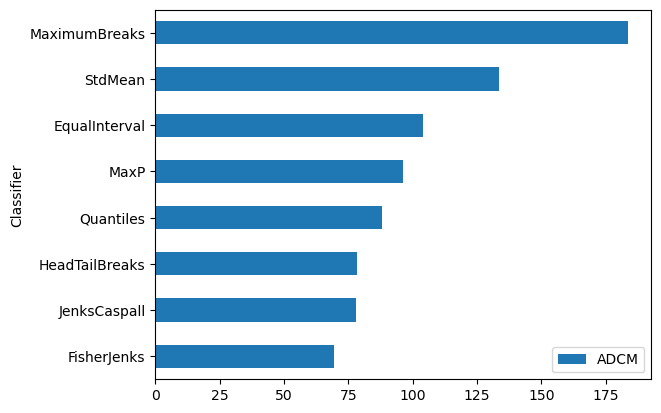

In [42]:
######

class5 = q5, ei5,msd, ht, mb5, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [43]:
theMap['Total_mb5'] = mb5.yb
#a=theMap['Total_mb5']
#a.unique()

array([0, 1, 3, 2])

In [44]:
#theMap.to_excel(os.path.join("data", "theMap_MCP.xlsx"))

In [45]:
changes={0:"0_Baja", 1:"1_Media", 2:"2_Alta", 3:"3_Muy alta"}
theMap[['Total_mb5_level']]=theMap.loc[:,['Total_mb5']].replace(to_replace=changes)

In [56]:
theMap.to_file(os.path.join("mapas","MapaMCP_dep.gpkg"), layer='peru', driver="GPKG")